<a href="https://colab.research.google.com/github/mohith2000/data-science-project/blob/main/mohithfinaldissertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install spacy

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 45.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
print("SpaCy language model loaded successfully!")


SpaCy language model loaded successfully!


In [ ]:
# libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings, gc
import re, string
warnings.simplefilter('ignore')
pd.set_option('display.max_colwidth', None)

# sklearn
from sklearn.feature_extraction.text import *
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.pipeline import *
from sklearn.compose import *
from sklearn.base import *
from sklearn.preprocessing import *

# spacy

import spacy
#pip3 pickle.dump(pipe3,open('Cyberbullying_model.pkl','wb'))install en-core-web-sm
import en_core_web_sm
from spacy.lang.en.stop_words import STOP_WORDS
#from spacy.tokenizer import Tokenizer
nlp = spacy.load('en_core_web_sm')
#spacy_tokenizer = Tokenizer(nlp.vocab)

# nltk
import nltk
from nltk.tokenize import TweetTokenizer
#nltk.download('wordnet')


# visualize
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# file path
df = pd.read_csv('/content/drive/My Drive/cyberbullying_tweets.csv')
# lower case column names
df.columns = [c.strip().lower() for c in df.columns]

# sampling records for easy training
n = 1000
df = df.groupby('cyberbullying_type', group_keys=False).apply(lambda x: x.sample(n))

# reset index
df.reset_index(drop=True, inplace=True)

# view
df.head()

,tweet_text,cyberbullying_type
0,Mad how all the girls who used to bully me in school actually just peaked in secondary school hahaha how’s life still living off mammy and daddy’s money???,age
1,"LMAOO don’t throw shade in the first sentence & end with “let’s each other” like, high school bully much???",age
2,Shittygamertakes left after admitting that they bullied and harassed a high school girl.,age
3,"As I think back on High School I remember that many of the students had one thing to say about the Bullies and the Hoods and that was ""He'll either become a Cop or a Crook"" and the only reason to be a Cop was so he could get away with alot more stuff. Sorry to the good Cops!",age
4,At all ! S/O to the girls who were bullied and slept on in high school. Y’all some bad bitches,age


In [ ]:
df.shape

(6000, 2)

In [ ]:
df.tail()

,tweet_text,cyberbullying_type
5995,1. you are a muslim? who knew 2. number 1 shouldn't matter 3. those family clusters are morons. Not cause of religion or race but because they are morons. 4. Could happen anywhere especially with those idiots who think they are bullet proof. Stay strong!,religion
5996,"Khawarij use to say the same as you say now. U ppl were terrorist &amp;will remain terrorist.Jews ,Amricn, Hindus, etc is betr than Khawarij, u ppl r Fisadi nt Jahadi .. U guys are disgrace to Islam and humanity. These Taliban killed thousands of afghans and you say it it's Jihad..",religion
5997,"I did, and I will, I have every right to bring God into it. I am a Christian woman. It’s the condition of people’s hearts. If they have no love in their heart for others then they will be bullies and be mean and hateful. So, please don’t tell me not to bring God into this.",religion
5998,"@BDSSupporter No, the Muslim states are the most murderous terrorist states on earth. It's not even close.",religion
5999,"Stop pushing men into becoming women as it is some okay thing. Seriously enough of this crap. What are you people trying to do? Become an America of no men? That's when the Muslims/Chinese attack you idiots, we need men in all their masculine glory and courage to keep our liberty",religion


In [ ]:
df.sample(10)

,tweet_text,cyberbullying_type
3042,"Bi-State Bully, that has a nice ring to it.. (@ Illinois State Line) http://4sq.com/ngpVoH",not_cyberbullying
5810,"That's why OsamaBinLaden was enjoying his last days peacefully in .Where else an Armed Jihadi (bloody Terrorist) can get refuge other than the hub of Global jihad.Enough of this,Jihad means Struggle shit.U think non Muslims r fool &amp; they can't see wt U guys r doing to Humanity.",religion
3692,"@vex0rian @Sir5000 @StormsOnSaturn yeah, i've got a cron to kick it. it must not be kicking it properly.",not_cyberbullying
3900,@hopeloze @kevinmenzel yeassssssss,not_cyberbullying
860,the girls that bullied me in high school,age
2230,well you need to get one to satisfy. and that will be hard if you call a woman/lady/female a bitch. unless she likes to be called that.,gender
98,"This reminds me of three specific girls in high school, I wasn’t bullied by them but they radiate this same energy",age
4489,@kuuuramantoonis I write bots to block it. :P,other_cyberbullying
713,In this school we say no to bullies! (Except for bullying Principal you guys may do that) :D,age
5180,Do what will happen? We want Jerusalem not only as Capital of Palastinians but Jerusalem is third holiest place for Muslims We will get it and never let go you idiot,religion


In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(subset='tweet_text',keep='first',inplace=True)

In [ ]:
df['tweet_text'].nunique()

5973

In [ ]:
df['cyberbullying_type'].value_counts()

,count
cyberbullying_type,
age,1000
ethnicity,1000
religion,1000
gender,999
not_cyberbullying,999
other_cyberbullying,975


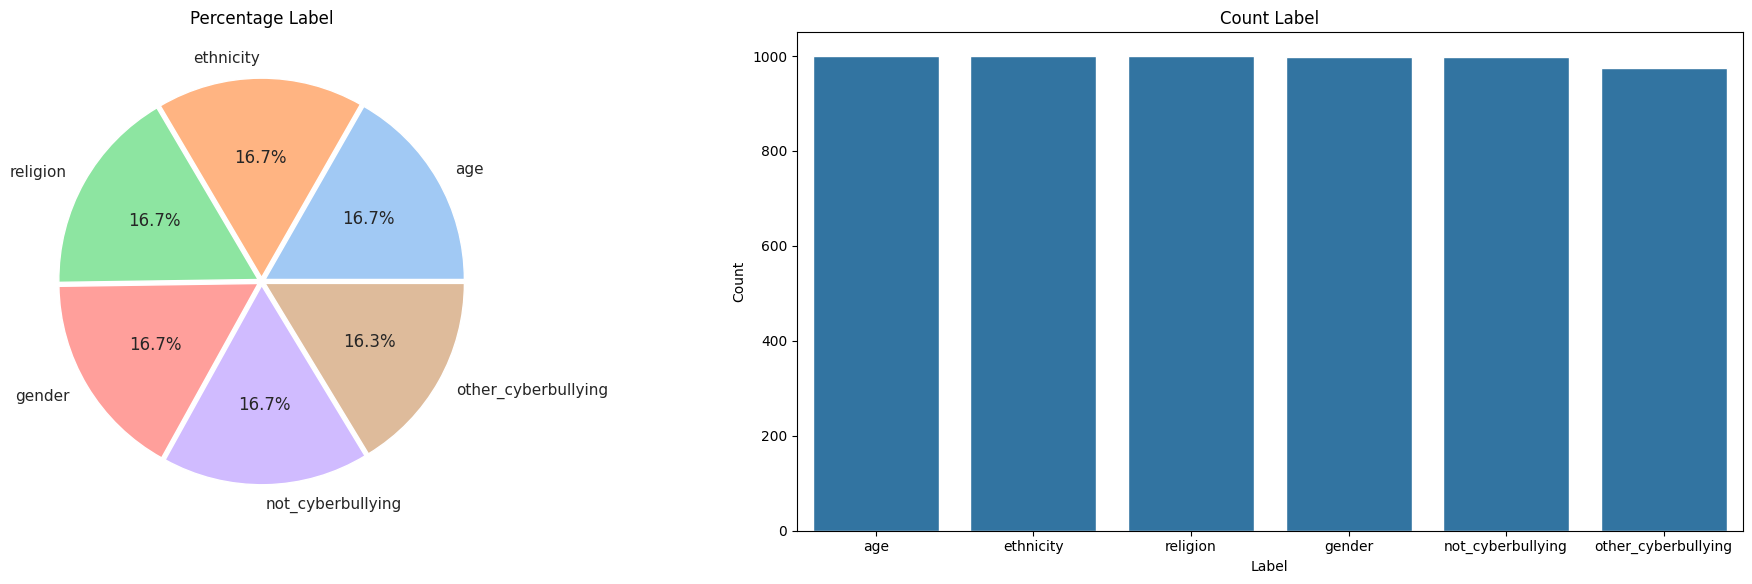

In [ ]:
#Value Label Count
label_count = df['cyberbullying_type'].value_counts()
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

#Set Vusualization
sns.set_theme(style='darkgrid', palette='pastel')
color = sns.color_palette(palette='pastel')
explode = [0.02]*len(label_count)

#Pie
axes[0].pie(label_count.values, labels=label_count.index, autopct='%1.1f%%', colors=color, explode=explode)
axes[0].set_title('Percentage Label')

#Bar
sns.barplot(x=label_count.index, y=label_count.values, ax=axes[1])
axes[1].set_title('Count Label')
axes[1].set_xlabel('Label')
axes[1].set_ylabel('Count')

#Show
plt.tight_layout()
plt.show()


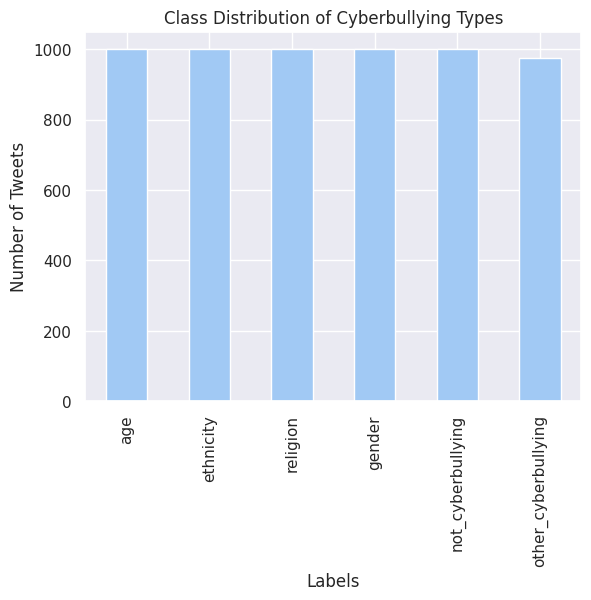

In [ ]:
# Create a bar plot of the class distribution
class_counts = df['cyberbullying_type'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Cyberbullying Types')
plt.xlabel('Labels')
plt.ylabel('Number of Tweets')
plt.show()

In [ ]:
from collections import Counter
import re

import nltk
from nltk.corpus import stopwords

In [ ]:
# Concatenate all tweet texts into a single string
all_text = ' '.join(df['tweet_text'].values)
# Remove URLs, mentions, and hashtags from the text
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)
# Split the text into individual words
words = all_text.split()

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Remove stop words
#nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

In [ ]:
# Count the frequency of each word
word_counts = Counter(words)
top_words = word_counts.most_common(100)
top_words

[('I', 1991),
 ('school', 838),
 ('like', 683),
 ('high', 588),
 ('RT', 540),
 ('dumb', 526),
 ('bullied', 521),
 ('people', 513),
 ('u', 399),
 ('fuck', 388),
 ('rape', 372),
 ('bully', 368),
 ('one', 348),
 ('gay', 344),
 ('&amp;', 325),
 ('get', 321),
 ('girls', 316),
 ('ass', 316),
 ('nigger', 304),
 ('The', 302),
 ('You', 297),
 ("I'm", 289),
 ('jokes', 270),
 ('girl', 261),
 ('think', 247),
 ('know', 244),
 ('black', 238),
 ('would', 236),
 ('got', 210),
 ('white', 205),
 ('say', 202),
 ('Muslims', 199),
 ('make', 194),
 ('called', 194),
 ('still', 182),
 ('This', 182),
 ('A', 176),
 ('And', 176),
 ('FUCK', 174),
 ('call', 170),
 ('-', 169),
 ('even', 168),
 ('never', 168),
 ('want', 165),
 ('women', 164),
 ('see', 162),
 ('joke', 161),
 ('said', 160),
 ('Muslim', 160),
 ('fucking', 159),
 ('ur', 154),
 ('Christian', 151),
 ('If', 150),
 ('shit', 149),
 ('right', 149),
 ('go', 147),
 ('really', 144),
 ('first', 141),
 ('bullies', 141),
 ('time', 140),
 ('support', 135),
 ('But', 

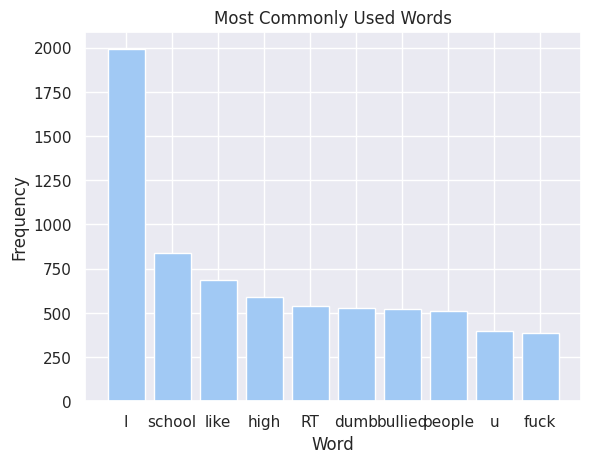

In [ ]:
# Create a bar chart of the most common words
top_words = word_counts.most_common(10) # Change the number to show more/less words
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.bar(x_values, y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()

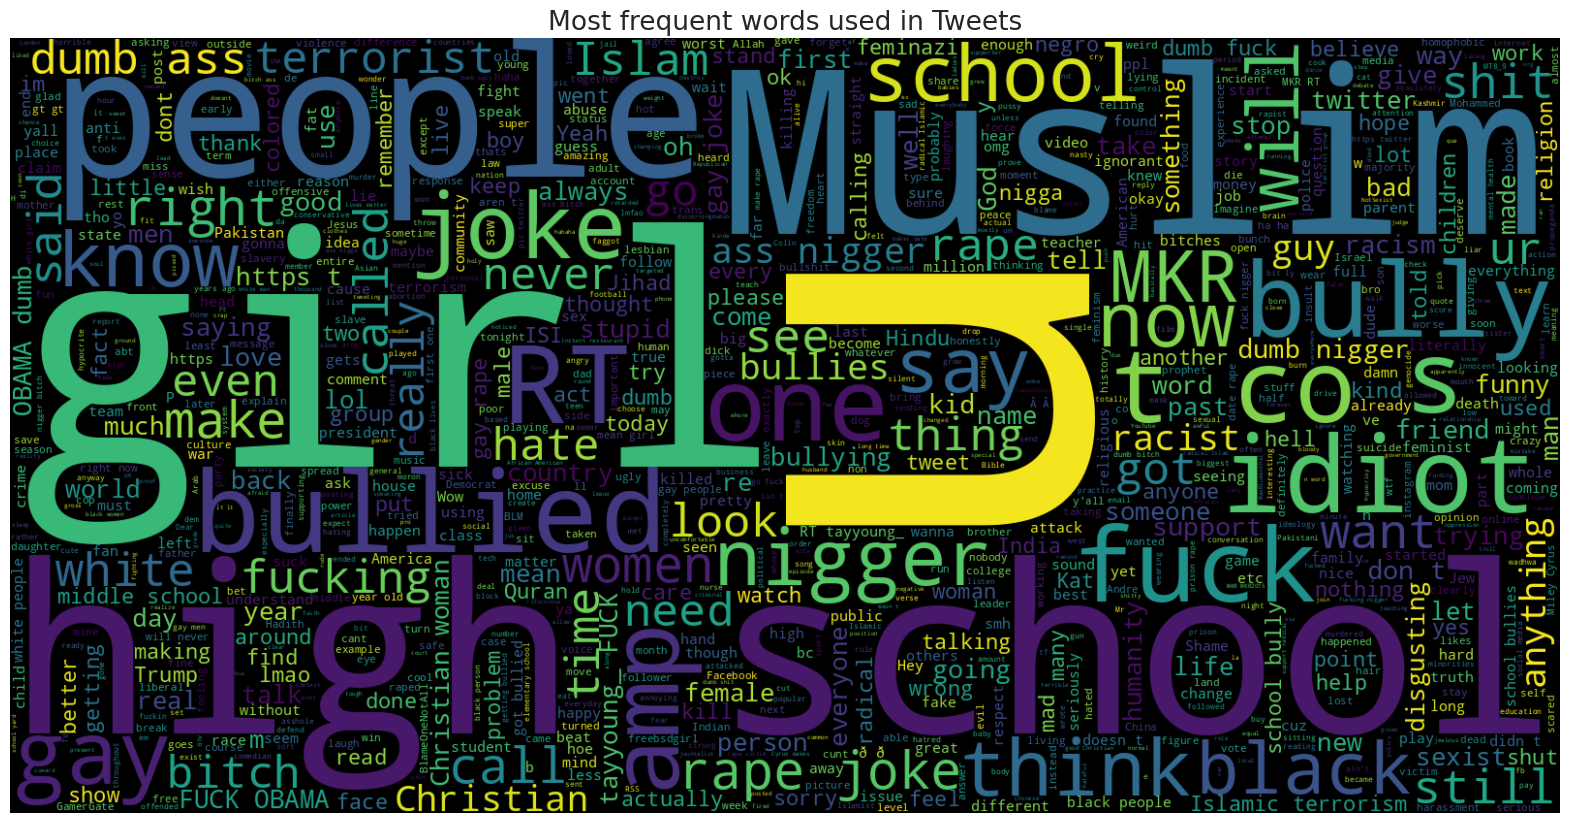

In [ ]:
#!pip install wordcloud
from wordcloud import WordCloud

text = ' '.join([word for word in df['tweet_text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=1000, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words used in Tweets', fontsize=19)
plt.show()

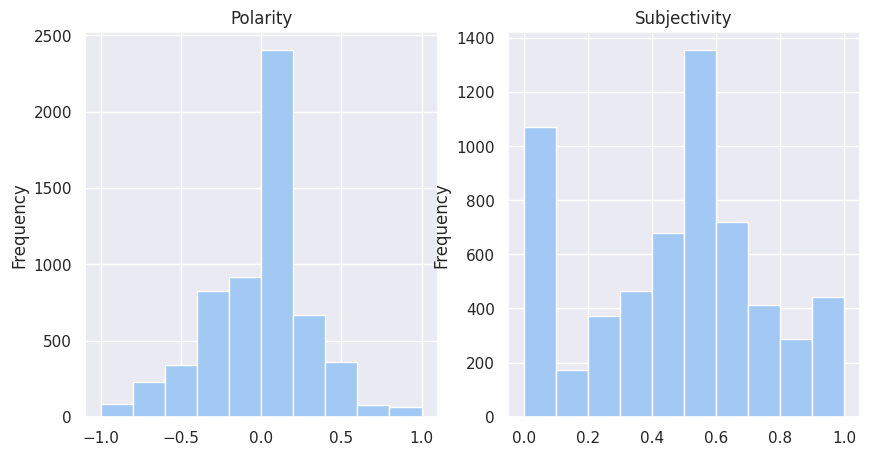

In [ ]:
#!pip install -U textblob
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

# perform sentiment analysis on each text in DataFrame
sentiment_scores = []
for text in df['tweet_text']:
    analysis = TextBlob(text)
    sentiment_scores.append((analysis.sentiment.polarity, analysis.sentiment.subjectivity))

# create DataFrame with sentiment scores
sentiment_df = pd.DataFrame(sentiment_scores, columns=['polarity', 'subjectivity'])

# plot distribution of sentiment scores
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sentiment_df['polarity'].plot(kind='hist', ax=axes[0], title='Polarity')
sentiment_df['subjectivity'].plot(kind='hist', ax=axes[1], title='Subjectivity')
plt.show()

In [ ]:
# utility function to clean text
def cleaner(raw):

    # convert to lower case
    processed_sent = str(raw).lower()

    # remove user mentions & urls
    processed_sent = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", processed_sent)

    # remove special chars
    processed_sent = re.sub(r'\W', ' ', str(processed_sent))

    # remove single characters from the start
    processed_sent = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_sent)

    # remove hashtags but keep the text
    processed_sent = processed_sent.replace("#", "").replace("_", " ")

    # remove digits
    processed_sent = re.sub(r'\d+', '', str(processed_sent))

    # remove non alphanumeric chars
    processed_sent = ' '.join(e for e in processed_sent.split(' ') if e.isalnum())
    processed_sent = re.sub(r'[^A-Za-z0-9]+', ' ', str(processed_sent))

    # remove single chars
    processed_sent = re.sub(r'\s+[a-zA-Z]\s+', ' ', str(processed_sent))

    # remove punctuations
    punct = list(string.punctuation)
    special_punct=['©', '^', '®',' ','¾', '¡','!']
    punct.extend(special_punct)
    for p in punct:
        if p in processed_sent:
            processed_sent = processed_sent.replace(p, ' ')

    return processed_sent.lower()


# utility function to remove stop words
def remove_stopwords(sentence):
    doc = nlp(sentence)
    filtered_tokens = [token for token in doc if not token.is_stop]
    return ' '.join([token.text for token in filtered_tokens])

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Load NLTK stemmer
stemmer = PorterStemmer()

def apply_stemming(text):
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# apply the function
df['tweet_text'] = df['tweet_text'].apply(lambda x: cleaner(x))
df['tweet_text'] = df['tweet_text'].apply(lambda x: remove_stopwords(x))
df['tweet_text'] = df['tweet_text'].apply(lambda x: apply_stemming(x))

# view
df.head(10)

,tweet_text,cyberbullying_type
0,mad girl bulli school actual peak secondari school hahaha life live mammi daddi money,age
1,lmaoo don throw shade sentenc end let like high school bulli,age
2,shittygamertak left admit bulli harass high school girl,age
3,think high school rememb student thing bulli hood ll cop crook reason cop away alot stuff sorri good cop,age
4,o girl bulli slept high school bad bitch,age
5,ran school bulli jeon jungkook look best friend kim taehyung walk ayo nt go jackson parti gay bitch gasp jeon jungkook gay,age
6,bitch school quran vers adeeth bio school racist bulli love,age
7,middl school day watch bulli gameplay say ye,age
8,strang famili bulli high school fuck bowli,age
9,found girl spread true rumour bi kinda bulli earli high school actual lesbian tri hit crack new layer queer ident,age


In [ ]:
df.sample(10)

,tweet_text,cyberbullying_type
5855,tri educ repeat lie stupid imam,religion
5481,funni actual suppos suppos china invad captur kashmir valley think go happen muslim live idiot heard chines educ camp muslim,religion
5601,campaign manag radic pakistani american know asia bibi christian woman jail decad blasphemi charg leav pakistan save life shame guy take support radic,religion
5314,woman despic liar con swore wa christian woman gave hrc question right news camera liar bigger belong gitmo fox kiss ass soro big buck puppet,religion
4293,god miss peopl hate miz mock daniel bryan smark idiot wrestlemania,other_cyberbullying
4643,ll happili use word feminazi don complain peopl caus troubl,other_cyberbullying
3039,fact produc broadli differ age prove deriv method wrong,not_cyberbullying
5140,chines peopl ok aa play sport don tri mix citizen chines communist parti media play aa crimin trust ccp amp muslim brotherhood blm antifa purpos use idiot,religion
2349,gay rape joke weren okay ok peopl doesn mean ok dark humour find remot like pedophilia funni definit thing wow,gender
601,think girl disgust get bulli internet high school shit don concern half peopl talk,age


In [ ]:
# feature engineering
x, y = df['tweet_text'], df['cyberbullying_type']

# train & test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=np.random.randint(10))

# view
print(f"Training Size: {x_train.shape[0]}\nValidation Size: {x_test.shape[0]}")

Training Size: 4778
Validation Size: 1195


In [ ]:
# define custom tokenizer
def tokenizer(txt):
    tok = TweetTokenizer()
    return tok.tokenize(txt)
# define vectorizer
vectorizer = HashingVectorizer(n_features=(2 ** 22),
                             ngram_range=(1,1),
                             tokenizer= tokenizer,
                             stop_words=list(STOP_WORDS))
# define classifier
kwargs = {'max_iter': 1000,
          'early_stopping': True,
          'n_jobs': -1,
          'random_state': np.random.randint(10),
          'class_weight': 'balanced',
          'average': True}

clf = PassiveAggressiveClassifier(**kwargs)


# create pipeline
pipe = Pipeline([('vectorizer', vectorizer),
                 ('classifier', clf)])

# fit pipe
pipe.fit(x_train,y_train)

# predictions
pred = pipe.predict(x_test)

# training accuracy
acc_tr = '{:.2%}'.format(pipe.score(x_train,y_train))
acc_act = '{:.2%}'.format(accuracy_score(y_test,pred))
print(f"Training Accuracy: {acc_tr}")
print(f"Validation Accuracy: {acc_act}")
report = classification_report(y_test,pred)
print(report)


Training Accuracy: 96.13%
Validation Accuracy: 81.59%
                     precision    recall  f1-score   support

                age       0.96      0.99      0.97       206
          ethnicity       0.97      0.99      0.98       202
             gender       0.88      0.83      0.86       201
  not_cyberbullying       0.54      0.56      0.55       194
other_cyberbullying       0.58      0.58      0.58       193
           religion       0.95      0.92      0.94       199

           accuracy                           0.82      1195
          macro avg       0.81      0.81      0.81      1195
       weighted avg       0.82      0.82      0.82      1195



In [ ]:
from sklearn.ensemble import AdaBoostClassifier


# define vectorizer
vectorizer = HashingVectorizer(n_features=(2 ** 22),
                             ngram_range=(1,1),
                             tokenizer= tokenizer,
                             stop_words=list(STOP_WORDS))






pipe1 = Pipeline([('vectorizer',vectorizer),
                  ('classifier',AdaBoostClassifier())])

#Train
pipe1.fit(x_train,y_train)

#Predict
pred = pipe1.predict(x_test)
# training accuracy
acc_tr = '{:.2%}'.format(pipe1.score(x_train,y_train))
acc_act = '{:.2%}'.format(accuracy_score(y_test,pred))
print(f"Training Accuracy: {acc_tr}")
print(f"Validation Accuracy: {acc_act}")
report = classification_report(y_test,pred)
print(report)

#print('Accuracy:{:.3f}'.format(accuracy_score(y_test,y_pred)))
#print(classification_report(y_test,y_pred,target_names=class_names))


Training Accuracy: 66.95%
Validation Accuracy: 67.03%
                     precision    recall  f1-score   support

                age       1.00      0.94      0.97       206
          ethnicity       1.00      0.81      0.90       202
             gender       0.97      0.55      0.70       201
  not_cyberbullying       0.35      0.97      0.51       194
other_cyberbullying       0.03      0.01      0.01       193
           religion       0.99      0.71      0.83       199

           accuracy                           0.67      1195
          macro avg       0.72      0.67      0.65      1195
       weighted avg       0.73      0.67      0.66      1195



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
matrix = cv.fit_transform(df['tweet_text'])
word_matrix = pd.DataFrame(matrix.toarray(),columns=cv.get_feature_names_out())

In [ ]:
outputs = matrix.toarray()
outputs[100:105,190:200]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
cv.get_feature_names_out()[:10]

array(['aa', 'aaa', 'aaaaaaaaaa', 'aaaand', 'aaj', 'aalaameen', 'aapn',
       'aaradhna', 'aatankwad', 'aatankwadi'], dtype=object)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
x = df['tweet_text']
#encode for train
y,class_names = pd.factorize(df['cyberbullying_type'],sort=True)


#split train & test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)

# view
print(f"Training Size: {x_train.shape[0]}\nValidation Size: {x_test.shape[0]}")


Training Size: 4479
Validation Size: 1494


In [ ]:
from sklearn.naive_bayes import MultinomialNB
# MultinomiaNB

pipe3 = Pipeline([('vectorizer',TfidfVectorizer()),
                  ('classifier',MultinomialNB())])

#Train
pipe3.fit(x_train,y_train)

#Predict
pred = pipe3.predict(x_test)

acc_tr = '{:.2%}'.format(pipe3.score(x_train,y_train))
acc_act = '{:.2%}'.format(accuracy_score(y_test,pred))
print(f"Training Accuracy: {acc_tr}")
print(f"Validation Accuracy: {acc_act}")
report = classification_report(y_test,pred)
print(report)


Training Accuracy: 88.35%
Validation Accuracy: 71.29%
              precision    recall  f1-score   support

           0       0.63      0.97      0.77       239
           1       0.76      0.94      0.84       256
           2       0.81      0.82      0.82       273
           3       0.60      0.32      0.42       234
           4       0.67      0.26      0.38       260
           5       0.73      0.96      0.83       232

    accuracy                           0.71      1494
   macro avg       0.70      0.71      0.68      1494
weighted avg       0.70      0.71      0.68      1494



In [ ]:
pipe4 = Pipeline([('vectorizer',TfidfVectorizer()),
                  ('classifier',LogisticRegression(max_iter=1000))])

#Train
pipe4.fit(x_train,y_train)

#Predict
pred = pipe4.predict(x_test)
acc_tr = '{:.2%}'.format(pipe4.score(x_train,y_train))
acc_act = '{:.2%}'.format(accuracy_score(y_test,pred))
print(f"Training Accuracy: {acc_tr}")
print(f"Validation Accuracy: {acc_act}")
report = classification_report(y_test,pred)
print(report)






Training Accuracy: 93.75%
Validation Accuracy: 80.39%
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       239
           1       0.98      0.98      0.98       256
           2       0.90      0.81      0.85       273
           3       0.53      0.59      0.56       234
           4       0.56      0.56      0.56       260
           5       0.94      0.94      0.94       232

    accuracy                           0.80      1494
   macro avg       0.81      0.81      0.81      1494
weighted avg       0.81      0.80      0.81      1494



In [ ]:
from sklearn.svm import SVC

pipe5 = Pipeline([('vectorizer',TfidfVectorizer()),
                  ('classifier',SVC())])

#Train
pipe5.fit(x_train,y_train)

#Predict
pred = pipe5.predict(x_test)
acc_tr = '{:.2%}'.format(pipe5.score(x_train,y_train))
acc_act = '{:.2%}'.format(accuracy_score(y_test,pred))
print(f"Training Accuracy: {acc_tr}")
print(f"Validation Accuracy: {acc_act}")
report = classification_report(y_test,pred)
print(report)



Training Accuracy: 98.55%
Validation Accuracy: 81.66%
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       239
           1       0.99      0.97      0.98       256
           2       0.94      0.79      0.86       273
           3       0.56      0.57      0.56       234
           4       0.57      0.67      0.62       260
           5       0.95      0.92      0.93       232

    accuracy                           0.82      1494
   macro avg       0.83      0.82      0.82      1494
weighted avg       0.83      0.82      0.82      1494



In [ ]:
# random list of text
random_txt = [
               "that is very dumb, you stupid",
               "that is not what I meant you moron",
               "you fucking idiot stop the video",
               "you such a sweet person",
               "fuck off whore",
               "lol.  ass.  I'm doing ok.  Get my stitches out tomorrow.  Hopefully be 100% in another week.",
               " Musilm are not allowed to the area",
               "right Christian woman",
               "You are a child you need to grow to be in this position you dumb",
                "School childrens are addicted to porn movies",
                "You are attacking christian society in the name of joke",
                "you are too old for this"

            ]

# predictions
random_pred = pipe.predict(random_txt)

# create a dataframe
random_df = pd.DataFrame({'random_text': random_txt, 'predictions': random_pred.tolist()})
random_df


,random_text,predictions
0,"that is very dumb, you stupid",ethnicity
1,that is not what I meant you moron,not_cyberbullying
2,you fucking idiot stop the video,religion
3,you such a sweet person,other_cyberbullying
4,fuck off whore,gender
5,lol. ass. I'm doing ok. Get my stitches out tomorrow. Hopefully be 100% in another week.,other_cyberbullying
6,Musilm are not allowed to the area,other_cyberbullying
7,right Christian woman,religion
8,You are a child you need to grow to be in this position you dumb,ethnicity
9,School childrens are addicted to porn movies,age


In [ ]:
#transfer

File size: 402657079 bytes


EOFError: Ran out of input

Model saved as CB.pkl
